<a href="https://colab.research.google.com/github/socrisogo/bc_social_media_productivity/blob/main/Proyecto_TTECH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presentación

Este proyecto se enfoca en el análisis exploratorio, descriptivo y de negocio sobre el mercado laboral global en el área de inteligencia artificial y aprendizaje automático, utilizando un conjunto de datos que contiene ofertas de empleo en diferentes países. A través de un enfoque técnico dividido en varias fases (ingestión, limpieza, análisis descriptivo y análisis de negocio), se busca extraer conocimientos clave sobre salarios, demanda de habilidades, adopción del trabajo remoto y patrones geográficos.

# Justificación

Este proyecto se estructura en cuatro fases técnicas clave: ingestión de datos, preparación y limpieza, análisis descriptivo y análisis de negocio. A partir de un conjunto de datos  que simula más de 15.000 ofertas de empleo relacionadas con inteligencia artificial en más de 50 países, se trabajará en la carga eficiente de los datos, validación de su estructura y conversión de tipos. Posteriormente, se realizará la limpieza de valores nulos o inconsistentes, la normalización de variables como monedas, niveles de experiencia y categorías de trabajo, así como la transformación de fechas y estandarización de ubicaciones. En la etapa de análisis descriptivo se aplicarán técnicas estadísticas y visualizaciones para explorar distribuciones salariales, demanda de habilidades, modalidades de empleo y tendencias temporales. Finalmente, en el análisis de negocio se evaluarán variaciones salariales según tamaño de empresa, tipo de contrato, país y relación remota, además del impacto de las habilidades requeridas y la educación mínima. Este enfoque técnico permitirá generar conclusiones relevantes para modelos predictivos, inteligencia empresarial, planificación profesional y análisis de brechas laborales en el mercado global de IA para 2025.

# Preguntas de negocio

1. Compensación y salarios

¿Qué países ofrecen los salarios promedio más altos en el área de IA? 

¿Cómo varía el salario promedio según el nivel de experiencia (EN(Junior), MI(Intermediate), SE(Senior), EX(Director))?

¿Cuál es la relación entre el tamaño de la empresa (S(Small), M(Medium), L(Large)) y el salario ofrecido?

¿Qué categorías de trabajo (científico de datos, ingeniero de ML, etc.) tienen mayores salarios?

¿Existe diferencia salarial significativa entre tipos de empleo (FT(Full time), PT(Part time), CT(Contract), FL(Freelance))?

¿Cuál es la relación entre el porcentaje de trabajo remoto y el salario promedio?

¿Qué industrias pagan más para roles de IA?

2. Análisis geográfico

¿Qué países concentran la mayor cantidad de ofertas laborales en IA?

¿Cómo se distribuyen los tipos de contratos por país?

¿Cuál es la relación entre ubicación de la empresa y residencia del empleado?

¿Dónde es más frecuente el trabajo remoto o híbrido?

¿Qué países tienen mayor demanda de determinadas habilidades?


3. Tendencias y evolución del mercado

¿Cómo ha evolucionado la oferta de empleo en IA a lo largo del tiempo?

¿Que habilidades son mas demandadas?

¿Se han incrementado las ofertas con modalidad remota?

¿Cuáles son los picos de publicación de vacantes en el año?

¿Se observan patrones en la duración entre la fecha de publicación y la fecha límite?

# Ingestión de datos

In [6]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

#socialmedia = pd.read_csv(r"C:\Users\scsoto\Documents\Analitica de Datos\social_media_vs_productivity.csv")
iajobs = pd.read_csv(r"https://raw.githubusercontent.com/jonathan093084/Proyecto_TalentoTech_UdeA/refs/heads/main/diversified_job_postings.csv")
iajobs.head(10)
#socialmedia.info()
#socialmedia.describe(include="all")


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,48140,USD,EN,Full-time,China,L,China,100,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.6,Smart Analytics
1,AI00002,AI Software Engineer,48260,USD,EN,Full-time,Canada,S,Ireland,0,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,7.7,TechCorp Inc
2,AI00003,AI Specialist,56983,USD,MI,Full-time,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,5.6,Autonomous Tech
3,AI00004,NLP Engineer,40985,USD,EN,Freelance,India,S,India,100,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,4.4,Future Systems
4,AI00005,AI Consultant,89894,EUR,MI,Contract,France,S,Singapore,0,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,5.6,Advanced Robotics
5,AI00006,AI Architect,81278,EUR,MI,Full-time,Germany,M,Germany,0,"Data Visualization, R, SQL, Linux",Associate,7,Healthcare,2024-08-31,2024-10-04,819,6.8,Neural Networks Co
6,AI00007,Principal Data Scientist,40825,GBP,EN,Freelance,United Kingdom,S,United Kingdom,50,"R, Docker, MLOps",Associate,3,Gaming,2024-12-29,2025-02-28,1936,10.0,DataVision Ltd
7,AI00008,NLP Engineer,32639,EUR,EN,Full-time,France,M,France,50,"Python, SQL, Computer Vision, Java, Azure",Master,0,Healthcare,2024-06-07,2024-07-01,1286,7.1,Cloud AI Solutions
8,AI00009,Data Analyst,111713,USD,SE,Full-time,Singapore,S,Singapore,50,"Hadoop, Git, Mathematics, Python",PhD,7,Government,2024-11-04,2024-11-24,551,9.8,Quantum Computing Inc
9,AI00010,AI Software Engineer,38949,USD,EN,Full-time,Austria,S,Austria,0,"MLOps, GCP, Scala, Azure, Linux",Master,5,Government,2024-10-20,2024-11-06,2340,4.3,Cloud AI Solutions


# Preparación y limpieza

In [4]:

#Reemplzar valores de nivel de experiencia 
iajobs['experience_level']=iajobs['experience_level'].str.strip().replace({"SE":"Expert","MI":"Intermediate","EN":"Junior","EX":"Director"})
iajobs['experience_level'].value_counts()
#iajobs = iajobs.drop('job_description_length', axis=1)
#iajobs.columns

#Reemplzar valores de tipo de empleo
iajobs['employment_type']=iajobs['employment_type'].str.strip().replace({"PT":"Part-time","FT":"Full-time","CT":"Contract","FL":"Freelance"})
iajobs['employment_type'].value_counts()

#Reemplzar valores de tamaño de compañia
iajobs['company_size']=iajobs['company_size'].str.strip().replace({"S":"Small","M":"Medium","L":"Large"})
iajobs['company_size'].value_counts()


Small     5946
Medium    5311
Large     3743
Name: company_size, dtype: int64

# Analítica descriptiva

                  salary_usd  benefits_score
experience_level                            
Director          168,902.30            6.52
Expert            114,911.78            6.44
Intermediate       70,202.21            6.48
Junior             37,473.64            6.47


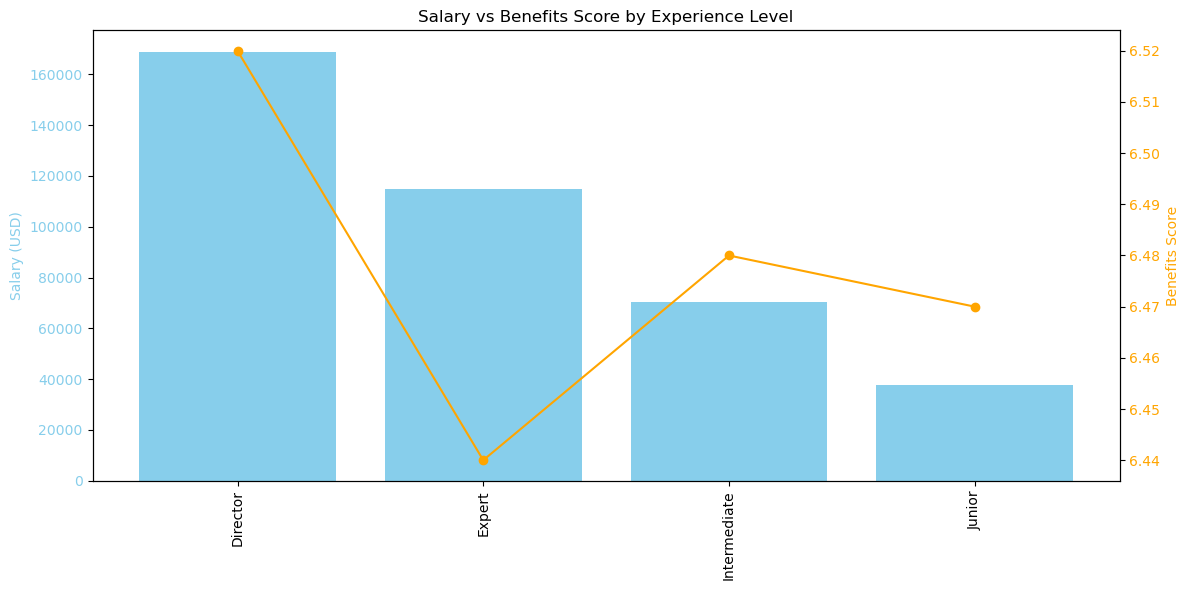

                                                        salary_usd  benefits_score
job_title                   company_name                                          
AI Architect                AI Innovations               72,296.33            6.39
                            Advanced Robotics            73,543.77            6.10
                            Algorithmic Solutions        64,159.07            6.68
                            Autonomous Tech              70,974.50            6.13
                            Cloud AI Solutions           62,994.98            6.18
                            Cognitive Computing          61,401.40            6.26
                            DataVision Ltd               74,964.38            6.34
                            DeepTech Ventures            76,114.22            6.22
                            Digital Transformation LLC   61,892.51            6.48
                            Future Systems               73,833.02            6.87
    

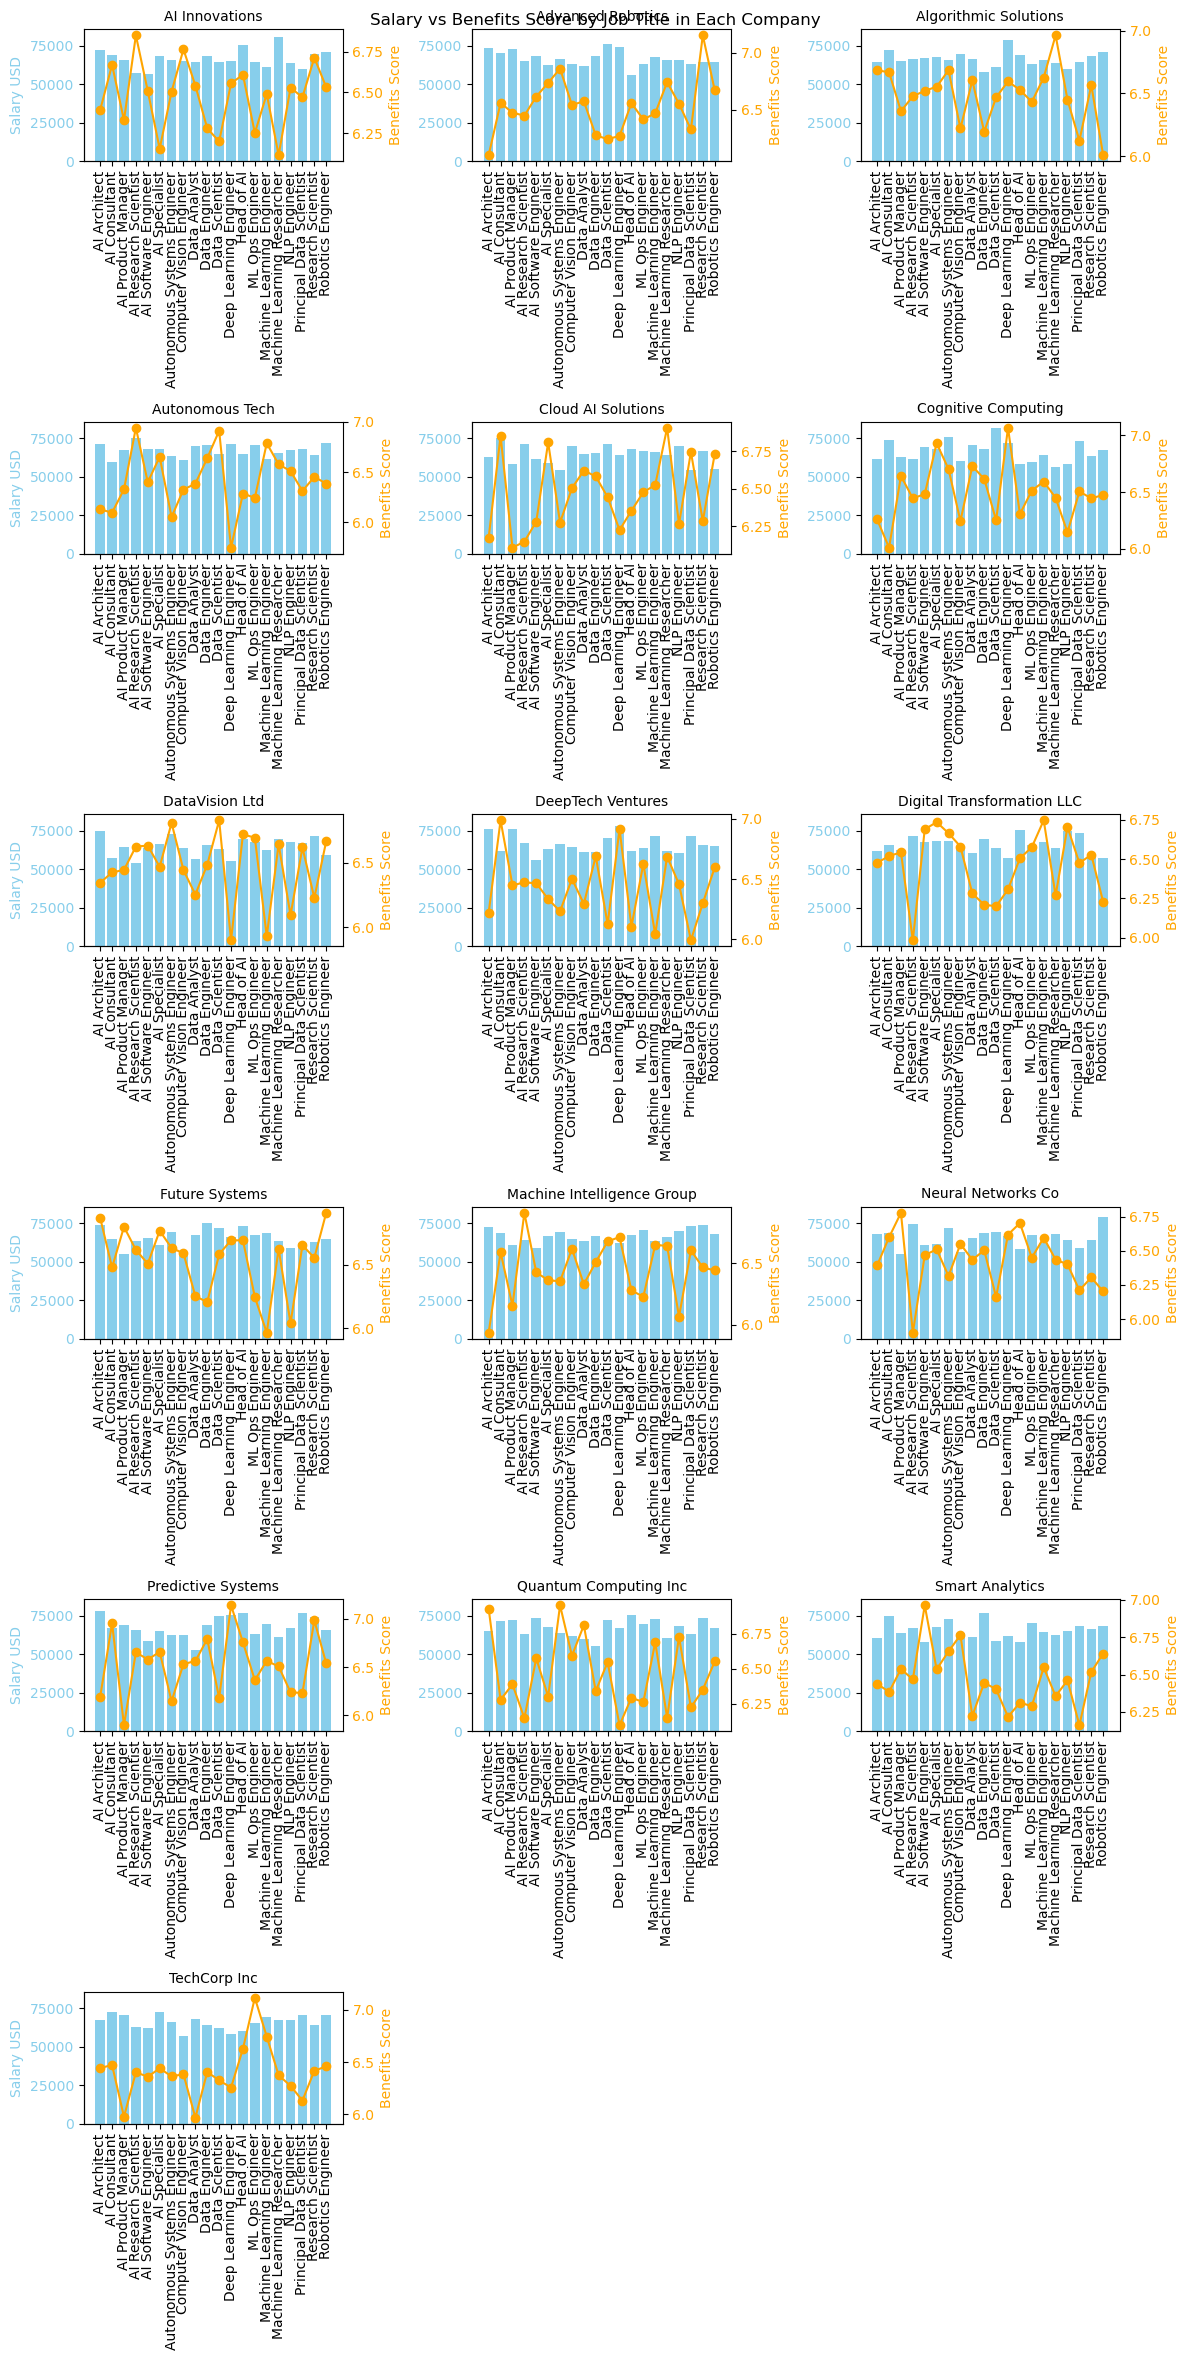

                 skill  count
8               Python   4450
13                 SQL   3407
21          TensorFlow   3022
2           Kubernetes   3009
12               Scala   2794
1              PyTorch   2777
3                Linux   2705
19                 Git   2631
10                Java   2578
20                 GCP   2442
11              Hadoop   2419
0              Tableau   2341
16                   R   2311
17     Computer Vision   2284
15  Data Visualization   2270
5        Deep Learning   2189
14               MLOps   2164
23               Spark   2155
4                  NLP   2145
18               Azure   2144
6                  AWS   2018
7          Mathematics   1943
9               Docker   1862
22          Statistics   1833


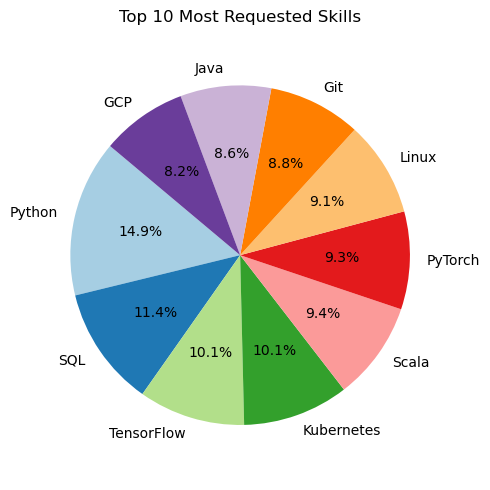

In [5]:
# Agrupamos por company name y sacamos la media de los salarios y des score de los beneficios
df_grouped = iajobs.groupby("experience_level")[["salary_usd","benefits_score"]].mean().round(2)
print(df_grouped.to_string(float_format='{:,.2f}'.format))
#df_grouped

fig, ax1 = plt.subplots(figsize=(12, 6))

# Eje Y1: salarios
ax1.bar(df_grouped.index, df_grouped['salary_usd'], color='skyblue', label='Salary USD')
ax1.set_ylabel('Salary (USD)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.tick_params(axis='x', rotation=90)

# Eje Y2: benefits_score
ax2 = ax1.twinx()
ax2.plot(df_grouped.index, df_grouped['benefits_score'], color='orange', marker='o', label='Benefits Score')
ax2.set_ylabel('Benefits Score', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('Salary vs Benefits Score by Experience Level')
plt.tight_layout()
plt.show()

df_grouped = iajobs.groupby(["job_title","company_name"])[["salary_usd", "benefits_score"]].mean()
print(df_grouped.to_string(float_format='{:,.2f}'.format))

# Datos base
df = df_grouped.reset_index()

# Crear grid
g = sns.FacetGrid(df, col="company_name", col_wrap=3, height=4, sharex=False)

# Función personalizada que dibuja barra + línea
def dual_axis_plot(data, color, **kwargs):
    ax = plt.gca()

    # Barras: salario
    ax.bar(data['job_title'], data['salary_usd'], color='skyblue')
    ax.set_ylabel('Salary USD', color='skyblue')
    ax.tick_params(axis='y', labelcolor='skyblue')
    ax.tick_params(axis='x', rotation=90)

    # Eje secundario: benefits
    ax2 = ax.twinx()
    ax2.plot(data['job_title'], data['benefits_score'], color='orange', marker='o')
    ax2.set_ylabel('Benefits Score', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

# Aplicar la función a cada panel
g.map_dataframe(dual_axis_plot)

# Títulos y espaciado
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("Salary vs Benefits Score by Job Title in Each Company")
plt.tight_layout()
plt.show()

#Validar las habilidades mas solicitadas en los diferentes trabajos
# 1. Separar los skills individuales
all_skills = iajobs['required_skills'].dropna().str.split(', ')

# 2. Aplanar la lista de listas
flat_skills = [skill.strip() for sublist in all_skills for skill in sublist]

# 3. Contar la frecuencia de cada skill
from collections import Counter
skill_counts = Counter(flat_skills)

# 4. Convertir a DataFrame para visualizar
skill_counts_df = pd.DataFrame(skill_counts.items(), columns=['skill', 'count']).sort_values(by='count', ascending=False)

print(skill_counts_df)

top_skills = skill_counts_df.head(10)  

plt.figure(figsize=(5, 5))
plt.pie(
    top_skills['count'],
    labels=top_skills['skill'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title('Top 10 Most Requested Skills')
plt.axis('equal')  # para que sea un círculo perfecto
plt.tight_layout()
plt.show()

# Análisis de negocio